# Getting started with AutoQASM
In this notebook, we demonstrate how to write and execute a quantum program with AutoQASM, using Bell state preparation as an example.

In [1]:
# general imports
from collections import Counter
import matplotlib.pyplot as plt

# AWS imports: Import Braket SDK modules
from braket.devices.local_simulator import LocalSimulator
import braket.experimental.autoqasm as aq
from braket.experimental.autoqasm.instructions import measure, h, cnot

## Build and run a Bell state program
As a hello-world example, we create a Bell state and execute it on the Braket local simulator. The quantum program is defined in the `bell_state` function. The `@aq.main` decorator marks the `bell_state` function as a quantum program and enables AutoQASM syntax in the function scope.

In [2]:
@aq.main
def bell_state():
    h(0)
    cnot(0, 1)
    return measure([0, 1])


The quantum program is defined by the decorated `bell_state` function. You can view the generated OpenQASM script with the `to_ir()` method. This can help you debug if you are already familiar with OpenQASM.

In [3]:
print(bell_state.to_ir())

OPENQASM 3.0;
output bit[2] return_value;
qubit[2] __qubits__;
h __qubits__[0];
cnot __qubits__[0], __qubits__[1];
bit[2] __bit_0__ = "00";
__bit_0__[0] = measure __qubits__[0];
__bit_0__[1] = measure __qubits__[1];
return_value = __bit_0__;


Here we submit the quantum program to the local simulator and obtain the results.

In [4]:
device = LocalSimulator()
result = device.run(bell_state, shots=100).result()
counts = Counter(result.measurements["return_value"])
print("measurement counts: ", counts)

measurement counts:  Counter({'11': 51, '00': 49})


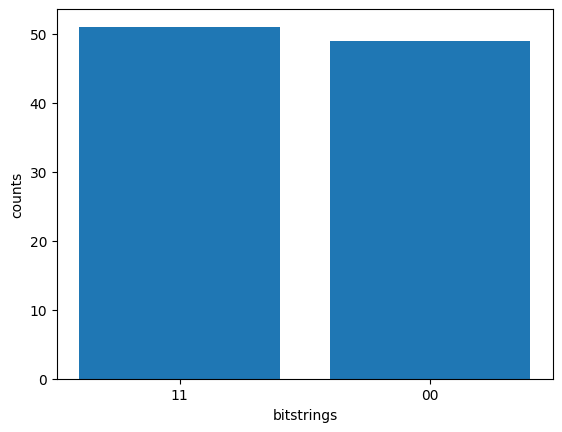

In [5]:
plt.bar(counts.keys(), counts.values())

plt.xlabel("bitstrings")
plt.ylabel("counts")
plt.show()

The output shows roughly equal measurement counts of the "00" and "11" bitstrings, a feature of the Bell state.

In this notebook, you learn how to use AutoQASM to compose a basic quantum program. To learn more about composing more complex quantum programs with control flow and subroutines, continue to the next AutoQASM example notebook!